In [1]:
# Import packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd



## To Perform clustering in IRIS dataset, using petal length & Width
Exercise for k means clustering
1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [2]:
df= pd.read_csv("C:\\dataset\iris.csv")
df.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# my clustering algo. based on petal length & width, so do all other columns

In [3]:
df1=df.drop(['Sepal_Length','Sepal_Width','Species'],axis=1)



In [8]:
df1.head()
df1.shape
df1.columns

Index(['Petal_Length', 'Petal_Width'], dtype='object')

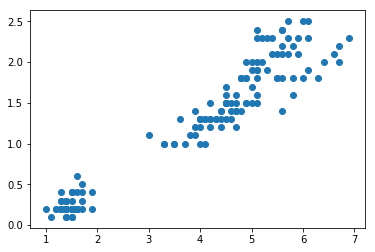

In [9]:
# EDA  - Scatter plot
plt.scatter(df1.Petal_Length,df1.Petal_Width)



In [12]:
# Apply KMean Clustering Algorithm
K= KMeans(n_clusters= 3)
K

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
y_predcit= K.fit_predict(df1[['Petal_Length','Petal_Width']])
y_predcit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Now group dataframe based on clusters
df1['cluster']=y_predcit
df1.head()

,Petal_Length,Petal_Width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [24]:
# TO find centroids 'K value
K.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

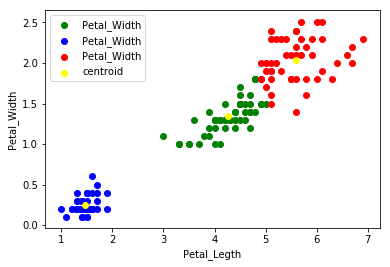

In [27]:
# Let see inscatter plot , how thr cluateres are grouped

df5= df1[df1.cluster==0]
df6= df1[df1.cluster==1]
df7= df1[df1.cluster==2]

plt.scatter(df5.Petal_Length,df5.Petal_Width,color = 'green')
plt.scatter(df6.Petal_Length,df6.Petal_Width,color = 'blue')
plt.scatter(df7.Petal_Length,df7.Petal_Width,color = 'red')

plt.scatter(K.cluster_centers_[:,0],K.cluster_centers_[:,1],color='yellow',label='centroid')

plt.xlabel("Petal_Legth")
plt.ylabel("Petal_Width")
plt.legend()

## # Elbow plot method - Used to find number of 'K' to find clusters



In [31]:
k_rng=range(1,10)
sse=[]
for i in k_rng:
    F=KMeans(n_clusters=i)
    F.fit(df1)
    sse.append(F.inertia_)


In [32]:
sse

[650.7886666666666,
 186.27970291146764,
 31.371358974358973,
 22.64244363044363,
 14.197400098993564,
 11.493190624783301,
 9.401636340852129,
 7.825741382868936,
 6.850950742240215]

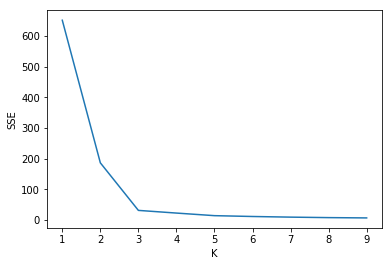

In [33]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [ ]:
# Based on ELbow method, clear represent that K=3 is best no. of cluster for given datset